In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(111)
var = ['X', 'Y']
labels = ['점0','점1','점2','점3','점4']
X = np.random.random_sample([5, 2]) * 10
df = pd.DataFrame(X, columns=var, index=labels)
print(df)

           X         Y
점0  6.121702  1.690698
점1  4.360590  7.692625
점2  2.953253  1.491630
점3  0.224783  4.202245
점4  2.386821  3.376562


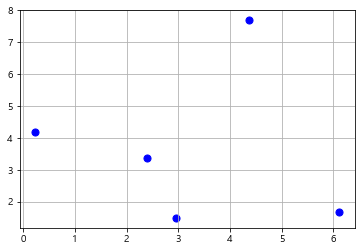

In [6]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)
plt.grid(True)
plt.show()


In [10]:
from scipy.spatial.distance import pdist, squareform
distmatrix = pdist(df, metric='euclidean') # 두 점 사이의 거리 계산
row_dist = pd.DataFrame(squareform(distmatrix), columns=labels, index=labels)
print(row_dist) # 두점 사이 거리 계산값 출력
row_dist

          점0        점1        점2        점3        점4
점0  0.000000  6.254970  3.174696  6.409487  4.097740
점1  6.254970  0.000000  6.358690  5.411807  4.745963
점2  3.174696  6.358690  0.000000  3.846035  1.968201
점3  6.409487  5.411807  3.846035  0.000000  2.314338
점4  4.097740  4.745963  1.968201  2.314338  0.000000


,점0,점1,점2,점3,점4
점0,0.000000,6.254970,3.174696,6.409487,4.097740
점1,6.254970,0.000000,6.358690,5.411807,4.745963
점2,3.174696,6.358690,0.000000,3.846035,1.968201
점3,6.409487,5.411807,3.846035,0.000000,2.314338
점4,4.097740,4.745963,1.968201,2.314338,0.000000


# Complete

In [8]:
from scipy.cluster.hierarchy import linkage # linkage() : 응집형 계층적 클러스터링 수행
row_clusters = linkage(distmatrix, method='complete')
row_clusters

array([[2.        , 4.        , 1.96820089, 2.        ],
       [3.        , 5.        , 3.84603471, 3.        ],
       [0.        , 1.        , 6.25496953, 2.        ],
       [6.        , 7.        , 6.40948658, 5.        ]])

In [9]:
pd.DataFrame(row_clusters, columns=['클러스터ID_1', '클러스터ID_2', '거리', '클러스터 멤버수'],
 index=['클러스터 %d' % (i+1) for i in range(row_clusters.shape[0])])


,클러스터ID_1,클러스터ID_2,거리,클러스터 멤버수
클러스터 1,2.0,4.0,1.968201,2.0
클러스터 2,3.0,5.0,3.846035,3.0
클러스터 3,0.0,1.0,6.254970,2.0
클러스터 4,6.0,7.0,6.409487,5.0


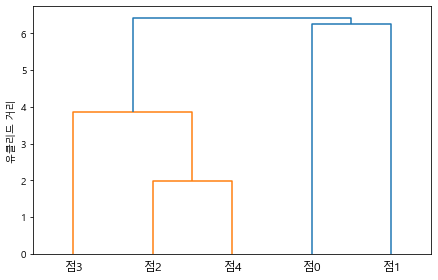

In [11]:
from scipy.cluster.hierarchy import dendrogram # dendrogram() : 클러스터의 계층 구조를 표현
row_dendrogram = dendrogram(row_clusters, labels=labels)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.tight_layout()
plt.ylabel('유클리드 거리')
plt.show()


In [17]:
# AgglomerativeClustering Parameters
# n_clusters: 클러스터 개수
# affinity: 거리 함수의 정의
# linkage: 연결 기준 옵션

from sklearn.cluster import AgglomerativeClustering
# n_clusters : 최종 클러스터 개수
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('클러스터 분류 결과 :', labels)


클러스터 분류 결과 : [2 1 0 0 0]


# Single

In [13]:
from scipy.cluster.hierarchy import linkage # linkage() : 응집형 계층적 클러스터링 수행
row_clusters2 = linkage(distmatrix, method='single')
row_clusters2

array([[2.        , 4.        , 1.96820089, 2.        ],
       [3.        , 5.        , 2.31433823, 3.        ],
       [0.        , 6.        , 3.1746961 , 4.        ],
       [1.        , 7.        , 4.74596264, 5.        ]])

In [14]:
pd.DataFrame(row_clusters2, columns=['클러스터ID_1', '클러스터ID_2', '거리', '클러스터 멤버수'],
 index=['클러스터 %d' % (i+1) for i in range(row_clusters.shape[0])])


,클러스터ID_1,클러스터ID_2,거리,클러스터 멤버수
클러스터 1,2.0,4.0,1.968201,2.0
클러스터 2,3.0,5.0,2.314338,3.0
클러스터 3,0.0,6.0,3.174696,4.0
클러스터 4,1.0,7.0,4.745963,5.0


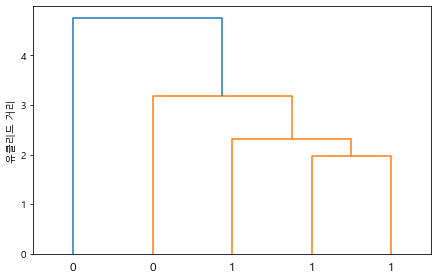

In [15]:
from scipy.cluster.hierarchy import dendrogram # dendrogram() : 클러스터의 계층 구조를 표현
row_dendrogram = dendrogram(row_clusters2, labels=labels)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.tight_layout()
plt.ylabel('유클리드 거리')
plt.show()


In [19]:
from sklearn.cluster import AgglomerativeClustering
# n_clusters : 최종 클러스터 개수
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
labels = ac.fit_predict(X)
print('클러스터 분류 결과 :', labels)


클러스터 분류 결과 : [0 1 0 0 0]


# iris data

In [20]:
# iris 데이터 로드
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", package="datasets")
iris_df = iris.data
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
# 레이블 인코딩(setosa:0 ~ virginica:2)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris_df.Species)
iris_df.Species = le.transform(iris_df.Species)
iris_df.Species


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

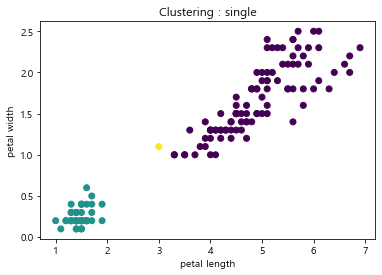

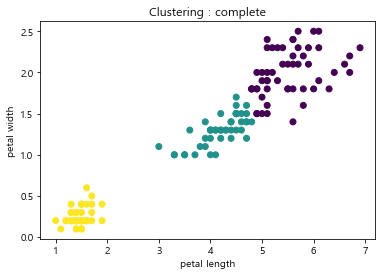

In [22]:
# Scikit-learn 패키지 사용
from sklearn.cluster import AgglomerativeClustering
#linkage = ['complete', 'average', 'ward'] # Centroid, Median은 오류 발생
linkage = ['single', 'complete']
for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=i)
    # 'petal length'와 'petal width' column을 사용
    hier.fit(iris_df.iloc[:, 2:4])
    plt.scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3], c=hier.labels_)
    plt.title('Clustering : ' + i)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
plt.show()


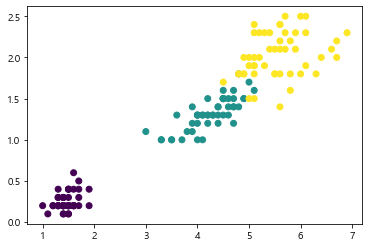

In [24]:
plt.scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3], c=iris_df.iloc[:, 4])


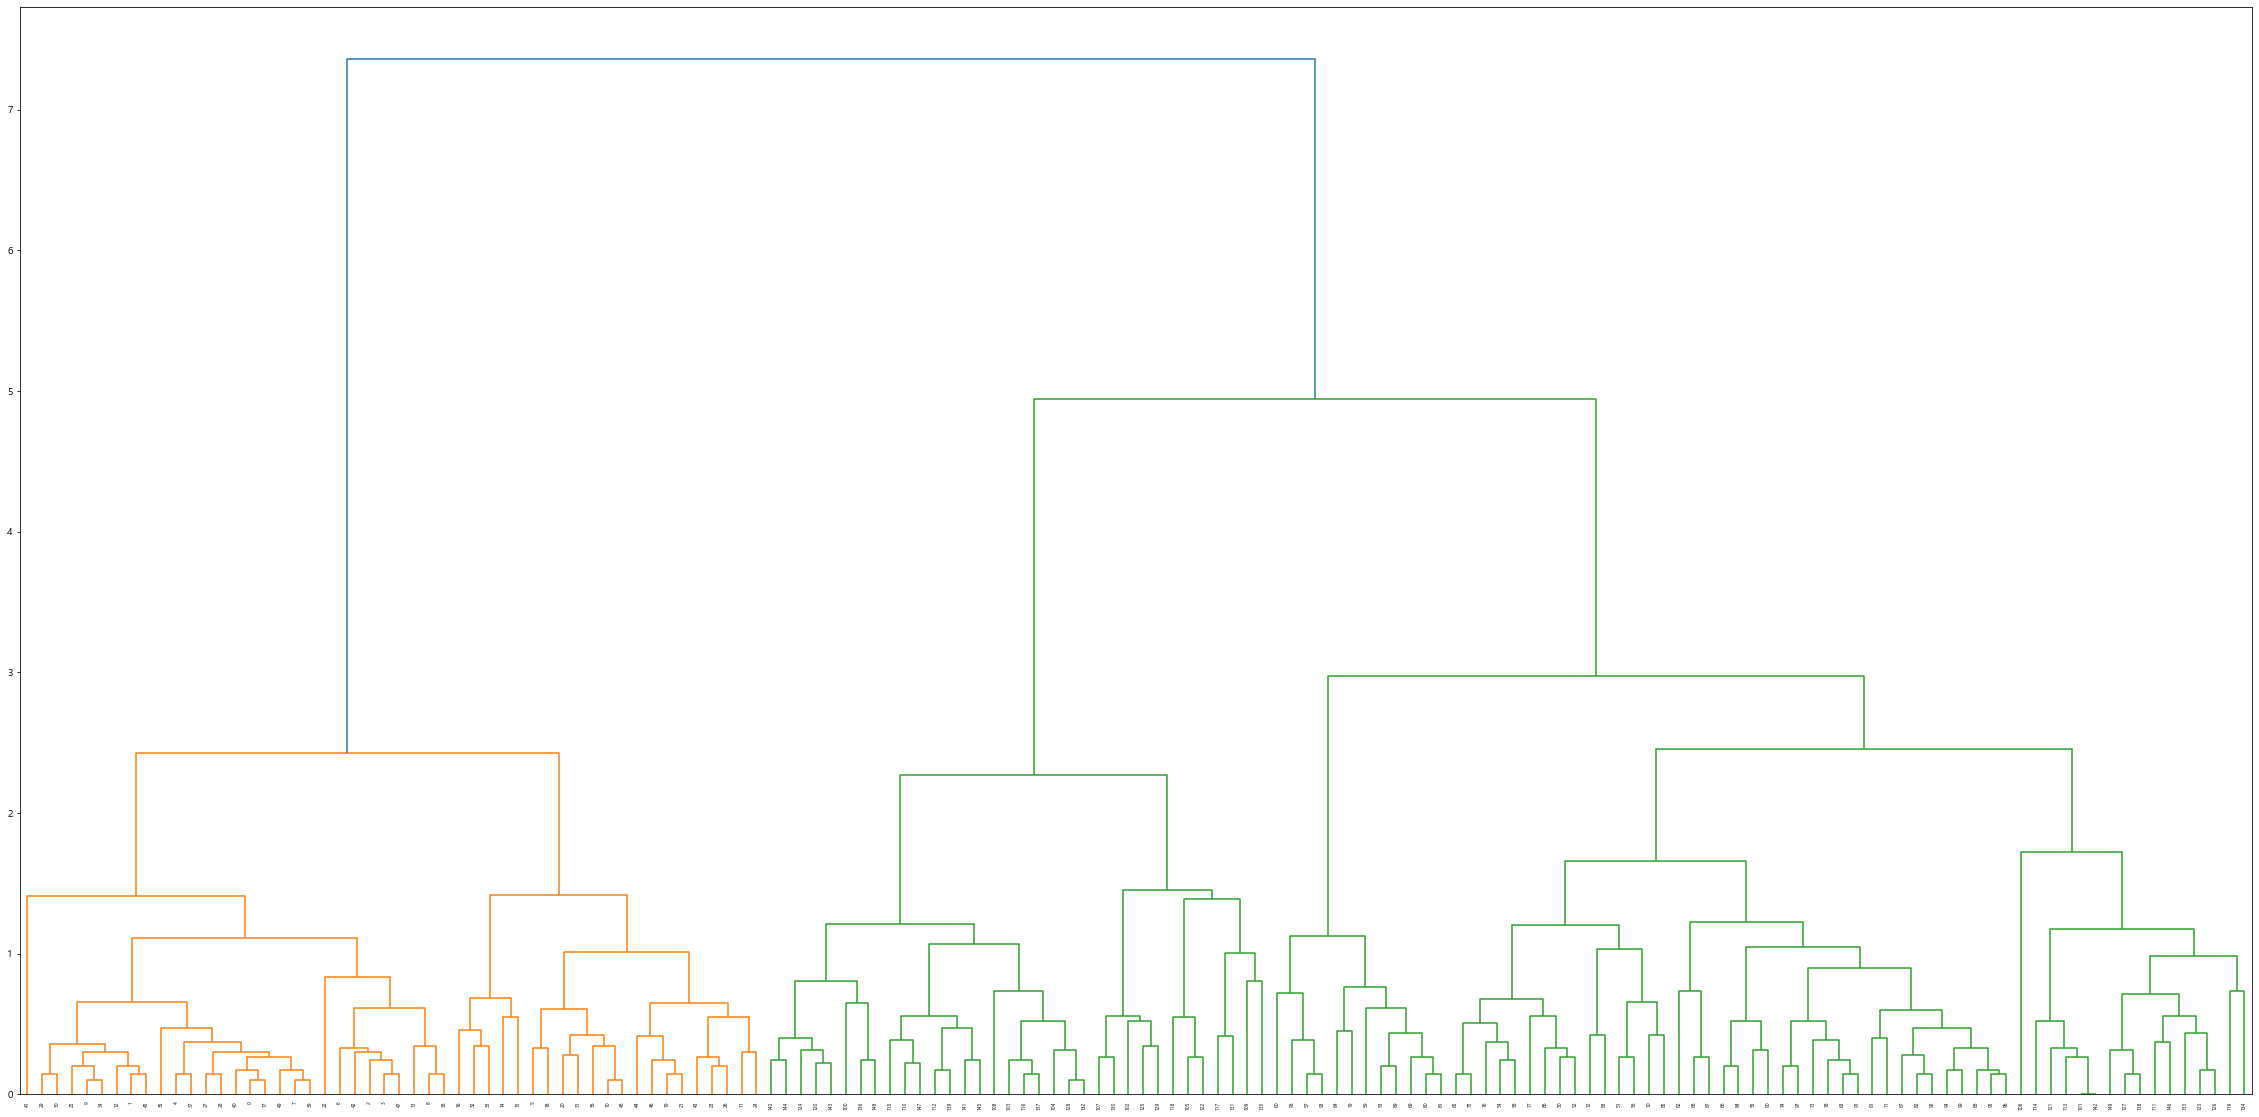

In [23]:
# 계층적 군집 실행
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
clustering = linkage(iris_df, method='complete')
plt.figure(figsize=(40,20))
dendrogram(clustering)# 덴드로그램으로 표현
plt.show()


In [26]:
from scipy.cluster.hierarchy import fcluster
# clustering : linkage()명령을 수행한 데이터. 
predict = fcluster(clustering, 3, criterion='distance') 
predict


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [29]:
# 클러스터링 할당 번호 재조정([1,3,2] -> [2,0,1])
import numpy as np
adjusted_pred = np.choose((predict-1), [0, 2, 1]).astype(np.int64)
adjusted_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [30]:
# 교차분류표 출력
import pandas as pd
# 0 -> 'setosa', 1 -> 'versicolor', 2 -> 'virginica'로 변환
pred_name = le.inverse_transform(adjusted_pred) 
origin_name = le.inverse_transform(iris_df.Species.values)
ct = pd.crosstab(origin_name, pred_name, rownames=["True"], colnames=["Predicted"], margins=True)
print(ct)


Predicted   setosa  versicolor  virginica  All
True                                          
setosa          50           0          0   50
versicolor       0          50          0   50
virginica        0          16         34   50
All             50          66         34  150


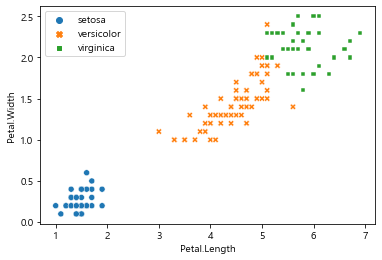

In [31]:
import seaborn as sns
ax = sns.scatterplot(x="Petal.Length", y="Petal.Width", hue=le.inverse_transform(adjusted_pred), 
                     style=le.inverse_transform(adjusted_pred), data=iris_df)


# BMI 사용 예

In [59]:
import pandas as pd

df = pd.read_csv('bmi.csv')
df = df.head(100)

data = df.iloc[:100, :]
l_data = data

# 레이블 인코딩(fat:0 ~ thin:2)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(data.label)
data.label = le.transform(data.label)
data
le.classes_

array(['fat', 'normal', 'thin'], dtype=object)

In [60]:
target = data['label']
data = data.drop(['label'], axis = 1)
print(data.shape)

(100, 2)

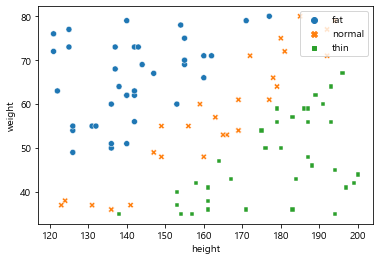

In [61]:
import seaborn as sns

ax = sns.scatterplot(x='height', y='weight', hue=le.inverse_transform(target),
                     style=le.inverse_transform(target), data=data)

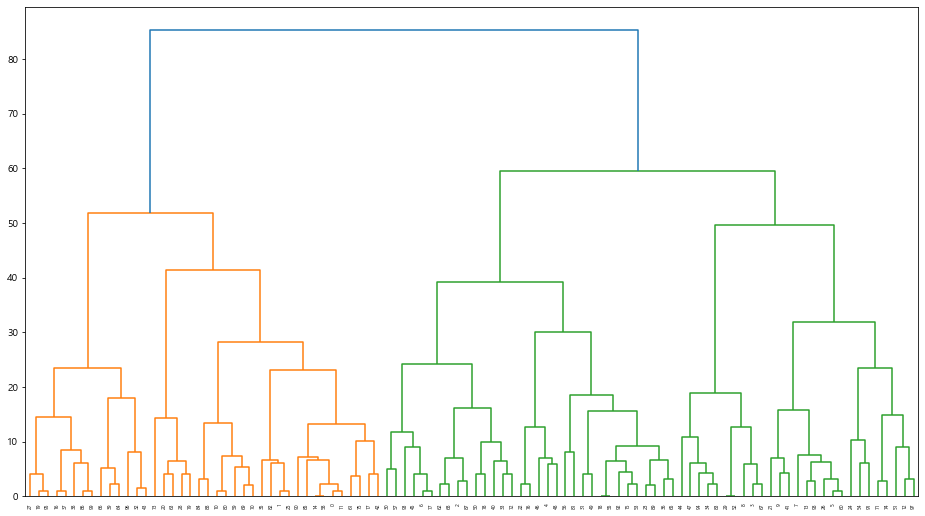

In [69]:
# 계층적 군집 실행
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

cluster_complete = linkage(data, method='complete', metric='euclidean')
plt.figure(figsize=(16, 9))
dg = dendrogram(cluster_complete)
#plt.show()


In [72]:
from scipy.cluster.hierarchy import fcluster

# #########################  ####### 이걸로 조정 This is what it is
predict = fcluster(cluster_complete, 55, criterion='distance')
predict


array([1, 1, 2, 3, 2, 3, 2, 3, 3, 3, 1, 1, 3, 3, 1, 2, 1, 1, 2, 1, 1, 3,
       2, 2, 3, 1, 3, 1, 1, 3, 2, 2, 1, 2, 3, 1, 2, 1, 1, 1, 2, 3, 1, 1,
       3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 1, 1, 3, 1, 2, 1, 1, 2,
       1, 3, 2, 1, 1, 3, 2, 1, 3, 1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 1, 2,
       1, 2, 1, 3, 2, 2, 3, 1, 1, 3, 3, 1], dtype=int32)

In [74]:
# 클러스터링 할당 번호 재조정([1,3,2] -> [2,0,1])
import numpy as np
adjusted_pred = np.choose((predict-1), [0, 1, 2]).astype(np.int64)
adjusted_pred

array([0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 0], dtype=int64)

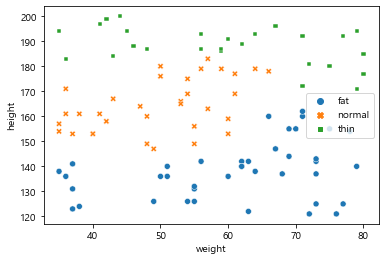

In [75]:
import seaborn as sns
ax = sns.scatterplot(x="weight", y="height", hue=le.inverse_transform(adjusted_pred), 
                     style=le.inverse_transform(adjusted_pred), data=df)


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

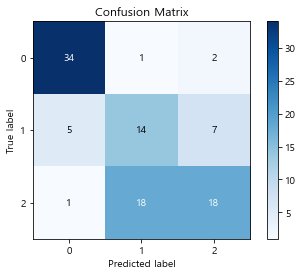

In [77]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(target, adjusted_pred)

In [ ]:
# 계층적 군집 실행
# from scipy.cluster.hierarchy import linkage, dendrogram
# import matplotlib.pyplot as plt

# clustering = linkage(df, method='complete')
# plt.figure(figsize=(16, 9))
# dendrogram(clustering)
# plt.show()

# mine

In [78]:
# iris 데이터 로드
import pandas as pd

df = pd.read_csv('bmi.csv')
df = df.head(100)
df

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
95,136,51,fat
96,131,37,normal
97,180,75,normal
98,191,60,thin


In [79]:
# 레이블 인코딩(fat:0 ~ thin:2)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df.label)
df.label = le.transform(df.label)
df


,height,weight,label
0,142,62,0
1,142,73,0
2,177,61,1
3,187,48,2
4,153,60,0
...,...,...,...
95,136,51,0
96,131,37,1
97,180,75,1
98,191,60,2


# Scikit-Learn

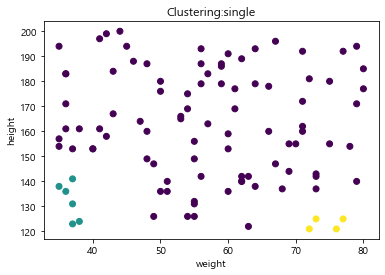

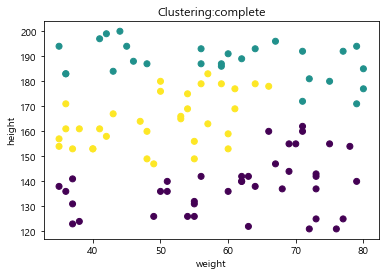

In [80]:
from sklearn.cluster import AgglomerativeClustering

#linkage = ['complete', 'average', 'ward'] # Centroid, Median은 오류 발생
linkage = ['single', 'complete']

for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=i)
    hier.fit(df.iloc[:,0:2])
    plt.scatter(df.iloc[:, 1], df.iloc[:, 0], c=hier.labels_)
    plt.title('Clustering:' + i)
    plt.xlabel('weight')
    plt.ylabel('height')
plt.show()

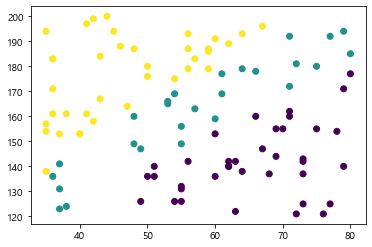

In [81]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 0], c=df.iloc[:,2])


# hierarchy

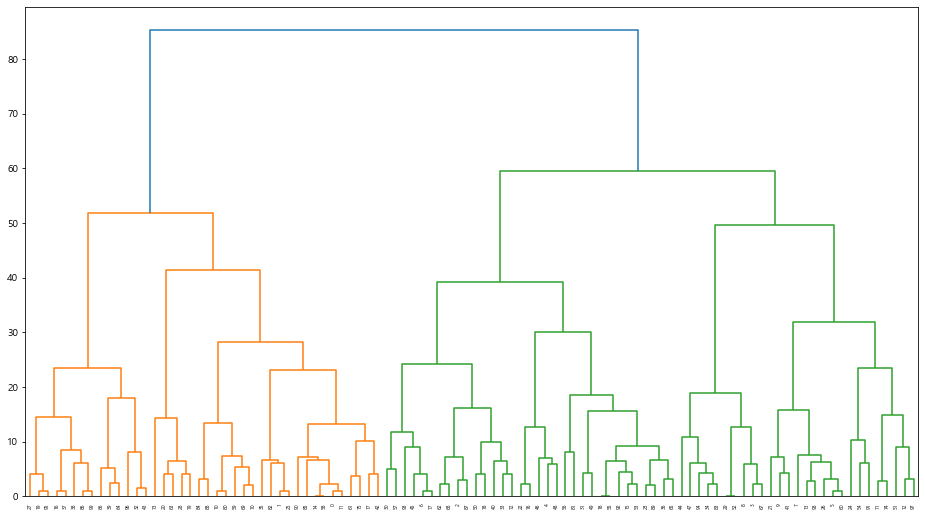

In [82]:
# 계층적 군집 실행
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

clustering = linkage(df, method='complete')
plt.figure(figsize=(16, 9))
dendrogram(clustering)
plt.show()


In [83]:
from scipy.cluster.hierarchy import fcluster

# clustering : linkage()명령을 수행한 데이터. 
#clustering = linkage(df, method='complete')

predict = fcluster(clustering, 55, criterion='distance')
predict


array([1, 1, 2, 3, 2, 3, 2, 3, 3, 3, 1, 1, 3, 3, 1, 2, 1, 1, 2, 1, 1, 3,
       2, 2, 3, 1, 3, 1, 1, 3, 2, 2, 1, 2, 3, 1, 2, 1, 1, 1, 2, 3, 1, 1,
       3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 1, 1, 3, 1, 2, 1, 1, 2,
       1, 3, 2, 1, 1, 3, 2, 1, 3, 1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 1, 2,
       1, 2, 1, 3, 2, 2, 3, 1, 1, 3, 3, 1], dtype=int32)

In [88]:
df1 = df
df1['pred'] = predict
df1

,height,weight,label,pred
0,142,62,0,1
1,142,73,0,1
2,177,61,1,2
3,187,48,2,3
4,153,60,0,2
...,...,...,...,...
95,136,51,0,1
96,131,37,1,1
97,180,75,1,3
98,191,60,2,3


In [84]:
# 클러스터링 할당 번호 재조정([1,3,2] -> [2,0,1])
import numpy as np
adjusted_pred = np.choose((predict-1), [0, 1, 2]).astype(np.int64)
adjusted_pred


array([0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 0], dtype=int64)

In [85]:
# 교차분류표 출력
import pandas as pd
# 0 -> 'setosa', 1 -> 'versicolor', 2 -> 'virginica'로 변환
pred_name = le.inverse_transform(adjusted_pred) 
origin_name = le.inverse_transform(df.label.values)
ct = pd.crosstab(origin_name, pred_name, rownames=["True"], colnames=["Predicted"], margins=True)
print(ct)


Predicted  fat  normal  thin  All
True                             
fat         34       1     2   37
normal       5      14     7   26
thin         1      18    18   37
All         40      33    27  100


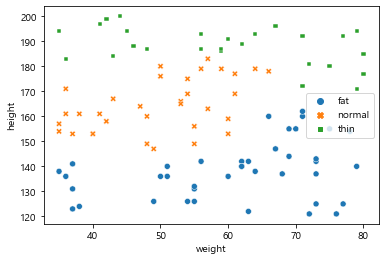

In [86]:
import seaborn as sns
ax = sns.scatterplot(x="weight", y="height", hue=le.inverse_transform(adjusted_pred), 
                     style=le.inverse_transform(adjusted_pred), data=df)


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

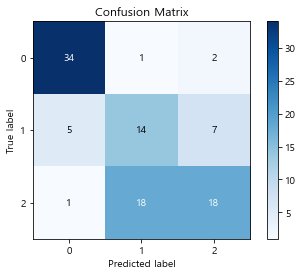

In [89]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(target, adjusted_pred)
